# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [135]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 617


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [136]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units=metric&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds =city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | touros
Processing Record 2 of Set 1 | olinda


Processing Record 3 of Set 1 | miracema do tocantins
Processing Record 4 of Set 1 | badger
Processing Record 5 of Set 1 | ancud
Processing Record 6 of Set 1 | porto novo
Processing Record 7 of Set 1 | punta arenas
Processing Record 8 of Set 1 | albany
Processing Record 9 of Set 1 | gambela
Processing Record 10 of Set 1 | santa cruz
Processing Record 11 of Set 1 | anadyr
Processing Record 12 of Set 1 | kodiak
Processing Record 13 of Set 1 | kitimat
Processing Record 14 of Set 1 | igarka
Processing Record 15 of Set 1 | hafnarfjordur
Processing Record 16 of Set 1 | taiohae
City not found. Skipping...
Processing Record 17 of Set 1 | sao gabriel da cachoeira
Processing Record 18 of Set 1 | talnakh
Processing Record 19 of Set 1 | georgetown
Processing Record 20 of Set 1 | al markaz
Processing Record 21 of Set 1 | klyuchi
Processing Record 22 of Set 1 | alice springs
Processing Record 23 of Set 1 | port-aux-francais
Processing Record 24 of Set 1 | tiksi
Processing Record 25 of Set 1 | edinbur

In [137]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          593
Lat           593
Lng           593
Max Temp      593
Humidity      593
Cloudiness    593
Wind Speed    593
Country       593
Date          593
dtype: int64

In [138]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,touros,-5.1989,-35.4608,26.75,83,73,2.91,BR,1709350645
1,olinda,-8.0089,-34.8553,27.85,89,20,2.06,BR,1709350646
2,miracema do tocantins,-9.5618,-48.3967,24.21,92,31,1.07,BR,1709350646
3,badger,64.8000,-147.5333,-24.07,52,0,0.00,US,1709350490
4,ancud,-41.8697,-73.8203,11.90,86,3,2.59,CL,1709350482


In [139]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [2]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,touros,-5.1989,-35.4608,26.75,83,73,2.91,BR,1709350645
1,olinda,-8.0089,-34.8553,27.85,89,20,2.06,BR,1709350646
2,miracema do tocantins,-9.5618,-48.3967,24.21,92,31,1.07,BR,1709350646
3,badger,64.8000,-147.5333,-24.07,52,0,0.00,US,1709350490
4,ancud,-41.8697,-73.8203,11.90,86,3,2.59,CL,1709350482


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

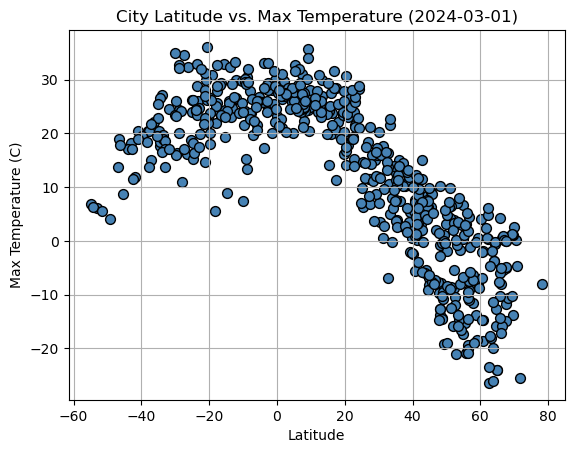

In [8]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot(kind="scatter", x="Lat", y="Max Temp", s=50, color="SteelBlue", edgecolor="black", grid=True)

# Incorporate the other graph properties
date = time.strftime('%Y-%m-%d', time.localtime(city_data_df["Date"].max()))
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title(f"City Latitude vs. Max Temperature ({date})")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

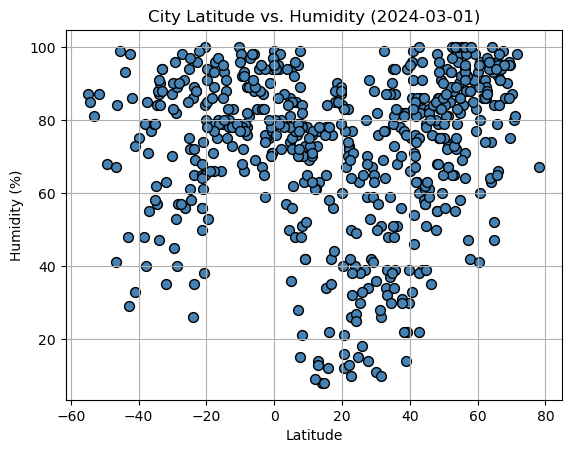

In [9]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot(kind="scatter", x="Lat", y="Humidity", s=50, color="SteelBlue", edgecolor="black", grid=True)

# Incorporate the other graph properties
date = time.strftime('%Y-%m-%d', time.localtime(city_data_df["Date"].max()))
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs. Humidity ({date})")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

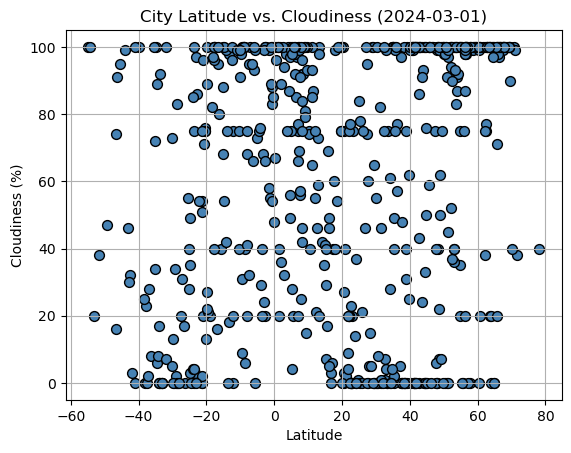

In [10]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot(kind="scatter", x="Lat", y="Cloudiness", s=50, color="SteelBlue", edgecolor="black", grid=True)

# Incorporate the other graph properties
date = time.strftime('%Y-%m-%d', time.localtime(city_data_df["Date"].max()))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs. Cloudiness ({date})")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

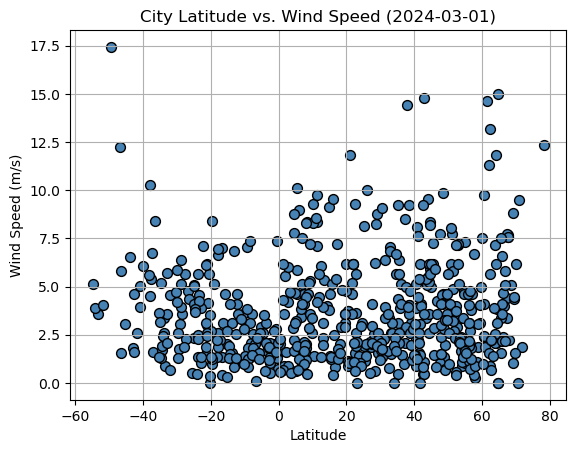

In [11]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot(kind="scatter", x="Lat", y="Wind Speed", s=50, color="SteelBlue", edgecolor="black", grid=True)

# Incorporate the other graph properties
date = time.strftime('%Y-%m-%d', time.localtime(city_data_df["Date"].max()))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title(f"City Latitude vs. Wind Speed ({date})")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [145]:
# Define a function to create Linear Regression plots
def scatter_plot_w_linear_regression(df, y, text_x, text_y):

  df.plot(kind="scatter", x="Lat", y=y, xlabel="Latitude", s=50, color="SteelBlue")

  (slope, intercept, r, _, _) = linregress(df["Lat"], df[y])

  reg_line = slope * df["Lat"] + intercept

  plt.plot(df["Lat"], reg_line, color="red")

  line_equation = f"y = {slope:.2f}x + {intercept:.2f}"
  plt.text(text_x, text_y, line_equation, fontsize=14, color="red", transform=plt.gca().transAxes) 

  print(f"The r-value is: {r}")

  plt.show()

In [146]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[(city_data_df["Lat"] > 0)]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,badger,64.8000,-147.5333,-24.07,52,0,0.00,US,1709350490
5,porto novo,6.4965,2.6036,27.90,85,85,3.44,BJ,1709350646
7,albany,42.6001,-73.9662,3.23,60,100,0.45,US,1709350201
8,gambela,8.2500,34.5833,25.71,51,46,1.42,ET,1709350647
10,anadyr,64.7500,177.4833,-12.72,84,100,15.00,RU,1709350494


In [147]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[(city_data_df["Lat"] < 0)]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,touros,-5.1989,-35.4608,26.75,83,73,2.91,BR,1709350645
1,olinda,-8.0089,-34.8553,27.85,89,20,2.06,BR,1709350646
2,miracema do tocantins,-9.5618,-48.3967,24.21,92,31,1.07,BR,1709350646
4,ancud,-41.8697,-73.8203,11.90,86,3,2.59,CL,1709350482
6,punta arenas,-53.1500,-70.9167,6.06,81,20,3.60,CL,1709350646


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8756844437207286


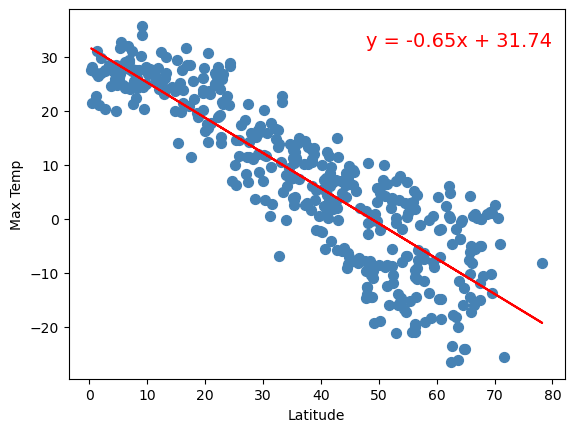

In [148]:
# Linear regression on Northern Hemisphere
scatter_plot_w_linear_regression(northern_hemi_df, y="Max Temp", text_x=0.6, text_y=0.9)

The r-value is: 0.5346836927425368


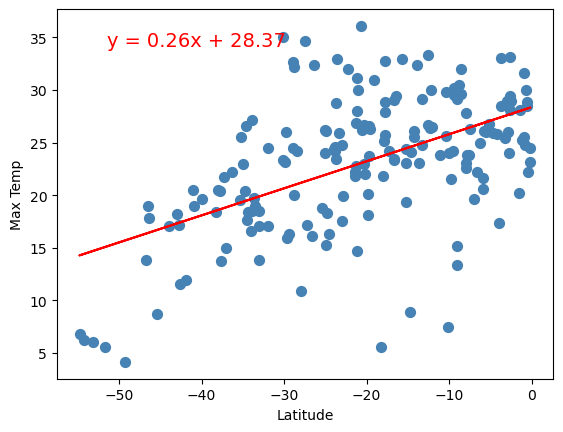

In [149]:
# Linear regression on Southern Hemisphere
scatter_plot_w_linear_regression(southern_hemi_df, y="Max Temp", text_x=0.1, text_y=0.9)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.33017316804069635


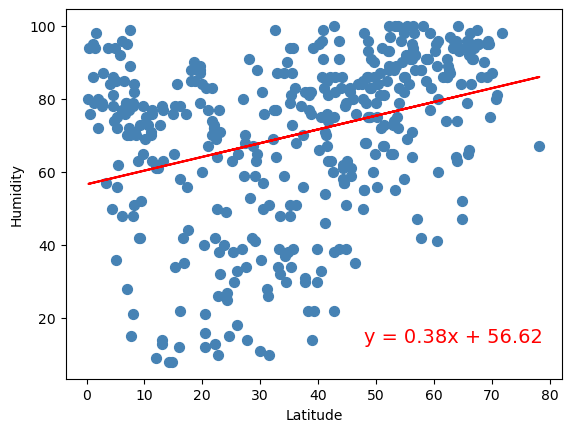

In [150]:
# Northern Hemisphere
scatter_plot_w_linear_regression(northern_hemi_df, y="Humidity", text_x=0.6, text_y=0.1)

The r-value is: 0.24487955319215993


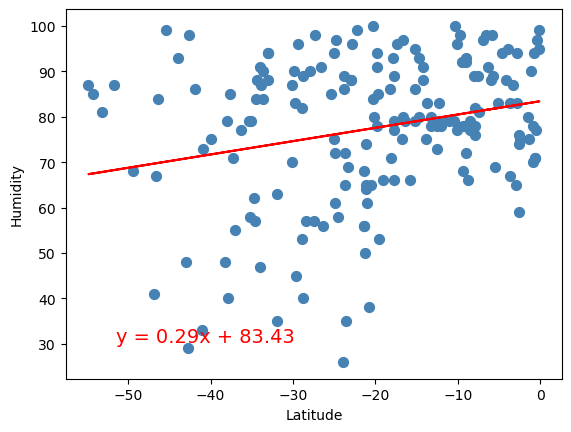

In [151]:
# Southern Hemisphere
scatter_plot_w_linear_regression(southern_hemi_df, y="Humidity", text_x=0.1, text_y=0.1)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.16992174442972877


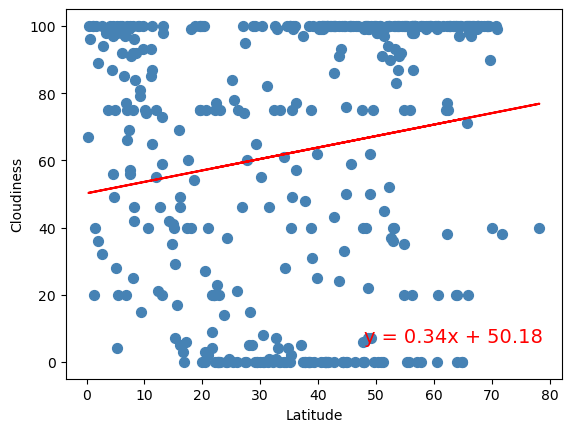

In [152]:
# Northern Hemisphere
scatter_plot_w_linear_regression(northern_hemi_df, y="Cloudiness", text_x=0.6, text_y=0.1)

The r-value is: 0.306987085025357


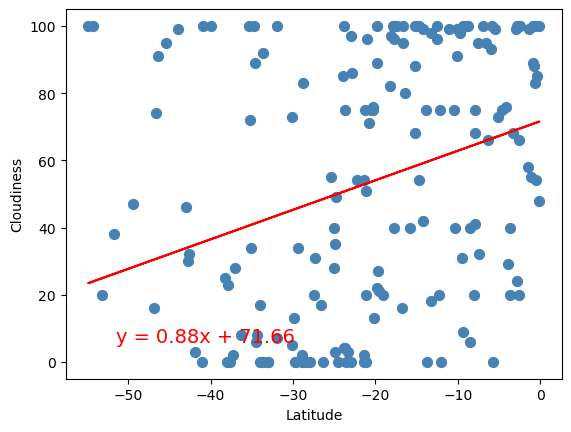

In [153]:
# Southern Hemisphere
scatter_plot_w_linear_regression(southern_hemi_df, y="Cloudiness", text_x=0.1, text_y=0.1)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.060930902386792246


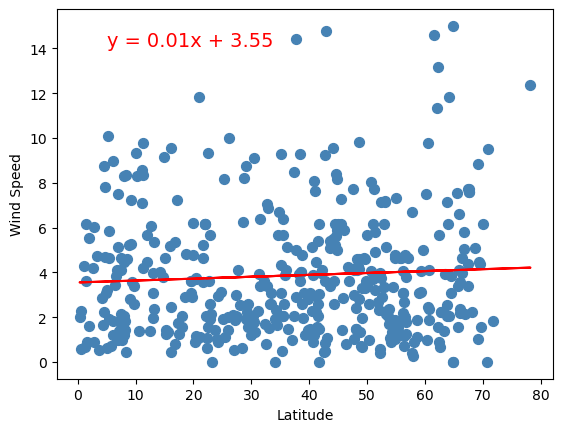

In [154]:
# Northern Hemisphere
scatter_plot_w_linear_regression(northern_hemi_df, y="Wind Speed", text_x=0.1, text_y=0.9)

The r-value is: -0.3950600243434863


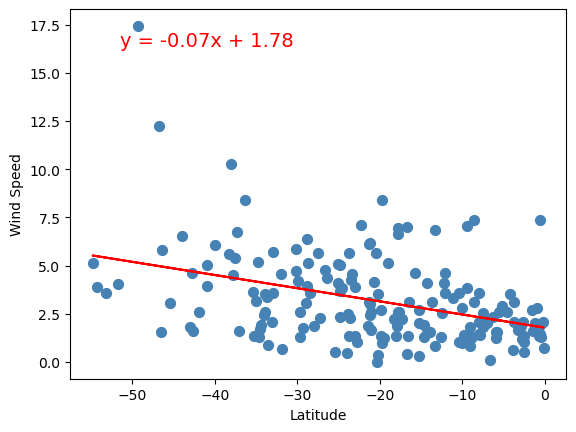

In [155]:
# Southern Hemisphere
scatter_plot_w_linear_regression(southern_hemi_df, y="Wind Speed", text_x=0.1, text_y=0.9)

**Discussion about the linear relationship:** YOUR RESPONSE HERE